<h2 style='background:black; border:0; color:white'><center>CAMPUS RECRUITMENT</center><h2>

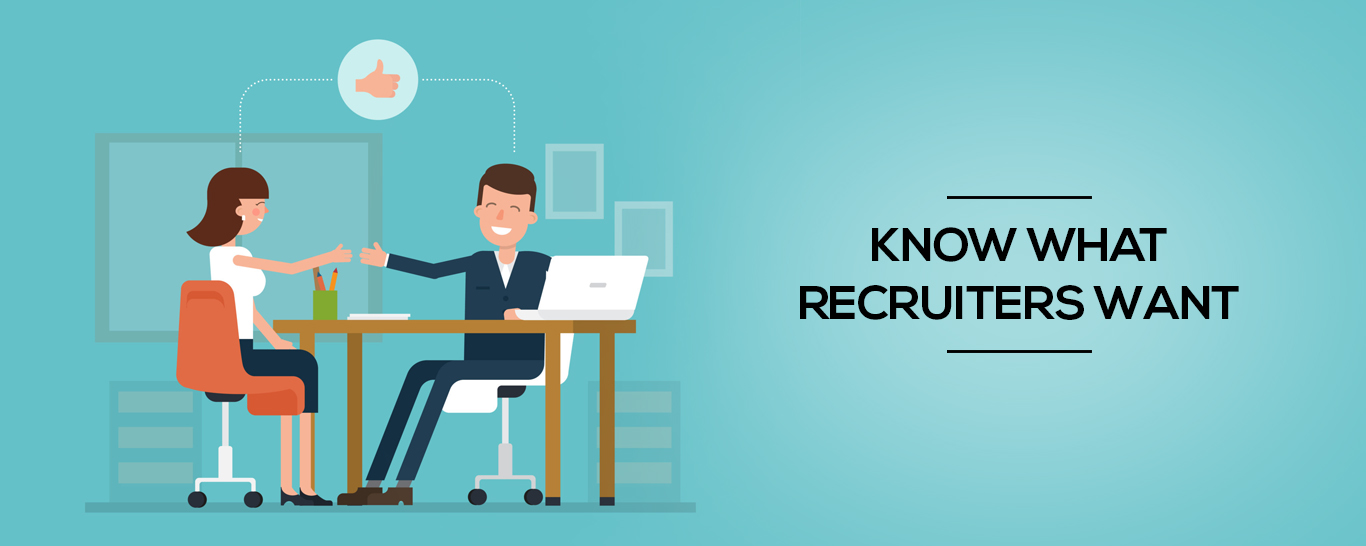

<h2 style='background:black; border:0; color:white'><center>PROBLEM STATEMENT</center><h2>



This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

<h2 style='background:black; border:0; color:white'><center>DATA DICTIONARY</center><h2>

* **sl_no** : Serial Number 
* **gender**: Gender- Male='M',Female='F'
* **ssc_p** : Secondary Education percentage- 10th Grade
* **ssc_b** : Board of Education- Central/ Others
* **hsc_b** : Higher Secondary Education percentage- 12th Grade
* **hsc_s** : Specialization in Higher Secondary Education
* **degree_p**: Degree Percentage
* **degree_t**: Under Graduation(Degree type)- Field of degree education
* **workex** : Work Experience
* **etest_p**: Entrance Test Percentage
* **mba_p**: MBA Percentage
* **status** : Placed or not
* **salary** : Salary offered

<h2 style='background:black; border:0; color:white'><center>CONTENTS</center><h2>

<a id="top"></a>
    
* [IMPORTING RELEVANT LIBRARIES](#1)


* [DATA INSPECTION](#2)


* [MISSING VALUES](#3)


* [IMPUTING MISSING VALUES](#4)


* [EXPLORATORY DATA ANALYSIS](#5)


* [UNIVARIATE ANALYSIS](#6)

    [* GENDER](#8)
    
    [* HIGHER SECONDARY BOARD](#9)
    
    [* SPECIALIZATION IN HIGHER SECONDARY EDUCATION](#10)
    
    [* DEGREE TYPE](#11)
    
    [* WORK EXPERIENCE](#12)
    
    [* SPECIALIZATION](#13)
    
    [* STATUS](#14)
    
    [* STATE BOARD](#15)
    
        
* [BIVARIATE AND MULTIVARIATE ANALYSIS](#16)

    [* GENDER](#17)
    
    [* SECONDARY EDUCATION PERCENTAGE](#18)
    
    [* STATE EDUCATION BOARD](#19)
    
    [* HIGHER SECONDARY EDUCATION PERCENTAGE - 12th GRADE](#20)
    
    [* HIGHER SECONDARY EDUCATION BOARD](#21)
    
    [* HIGHER SECONDARY EDUCATION SPECIALIZATION](#22)
    
    [* DEGREE PERCENTAGE](#23)
    
    [* DEGREE TYPE](#24)
    
    [* WORK EXPERIENCE](#25)
    
    [* ENTRANCE TEST PERCENTAGE](#26)
    
    [* SPECIALISATION](#27)
    
    [* MBA PERCENTAGE](#28)
    
    [* SALARY](#29)
    
    
* [ WHY PLACED?](#30)

 
* [ WHY NOT PLACED?](#31)


* [ ENCODING CATEGORICAL VARIABLES](#32)


* [ MODEL SELECTION](#33)


* [ FEATURE SCALING](#34)


* [CLASSIFICATION ALGORITHMS:](#35)

   [* LOGISTIC REGRESSION](#36)
   
   [* RANDOM FOREST CLASSIFICATION](#39)
   
        
* [CLOSING COMMENTS](#41)


<a id="1"></a>
## IMPORTING RELEVANT LIBRARIES

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',500)
%matplotlib inline
sns.set()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

<a id="2"></a>
## DATA INSPECTION

In [ ]:
campus = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [ ]:
# Let's see head of our data.
campus.head()

In [ ]:
# Let's see how many rows and columns we have.
campus.shape

In [ ]:
# Let's dig in some more info.
campus.info()

In [ ]:
num = campus.select_dtypes(include=[np.float64,np.int64])
print("Numerical Columns:",num.shape[1])

In [ ]:
cat = campus.select_dtypes(include=[np.object])
print("Categorical Columns:",cat.shape[1])

We have 7 Numerical and 8 Categorical columns.

In [ ]:
campus.describe()

In [ ]:
campus.set_index('sl_no',inplace=True)

<a id="3"></a>
## MISSING VALUES

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(campus.isnull(),cbar=False)

### We can see that there is only **Salary** column has **Missing Values**.

**Do you wonder why?**

Yes! The Salary has null values because the students who aren't placed will not have any Salary values.

We can replace the null values with **0**.

<a id="4"></a>
## IMPUTING MISSING VALUES

In [ ]:
campus['salary'].fillna('0',inplace=True)

In [ ]:
campus.isnull().sum()

<a id="5"></a>
## EXPLORATORY DATA ANALYSIS

In [ ]:
campus.head()

<a id="6"></a>
## UNIVARIATE ANALYSIS

<a id="8"></a>
## 1) GENDER

In [ ]:
campus.gender.value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('gender',data=campus,palette='Accent')

### Observations:
    
* We have about 64% of Male and 35% of Female students for placement.

<a id="9"></a>
### 2) HIGHER SECONDARY BOARD

In [ ]:
campus['hsc_b'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('hsc_b',data=campus,palette='magma')

### Observations:
    
* We have about 60% from Other Boards and 40% from Central Board.

<a id="10"></a>
### 3) SPECIALIZATION IN HIGHER SECONDARY EDUCATION

In [ ]:
campus['hsc_s'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('hsc_s',data=campus,palette='mako')

### Observations:
    
* We have **52%** from **Commerce** , **42%** from **Science** and **5%** from **Arts** Specialization.

<a id="11"></a>
### 4) DEGREE TYPE

In [ ]:
campus['degree_t'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('degree_t',data=campus,palette='plasma')

### Observations:
    
* We have **67%** from **Commerce & Management** , **27%** from **Science & Tech** and **Others**.
* Most of the student schnaged their path from Science and Arts towards Commerce and Management.

<a id="12"></a>
### 5) WORK EXPERIENCE

In [ ]:
campus['workex'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('workex',data=campus,palette='summer')

### Observations:
    
* We have majority of students who doesn't have prior experience. It would be interesting to see experienced or non-experienced students get placed.

<a id="13"></a>
### 6) SPECIALIZATION

In [ ]:
campus['specialisation'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('specialisation',data=campus,palette='autumn')

### Observations:
    
* We have majority of students who opted for **Marketing & Finance** Specialization.

### MBA in Finance. MBA in finance is one of the most popular and highly opted for forms of MBA specialization.

<a id="14"></a>
### 7) STATUS

In [ ]:
campus['status'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('status',data=campus,palette='spring')

### Observations:
    
* We have majority of students **Placed** and also our target variable seems to be **well-balanced**.

<a id="15"></a>
### 8) STATE BOARD 

In [ ]:
campus['ssc_b'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('ssc_b',data=campus,palette='GnBu')

In [ ]:
campus.head()

<a id="16"></a>
### BIVARIATE AND MULTIVARIATE ANALYSIS

<a id="17"></a>
### 1) GENDER

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('gender',hue='status',data=campus,palette='winter')

### Observations:
    
* The male students tend to have been placed in maximum number when compared to female ones.

In [ ]:
avg_per= campus.groupby(['gender','status'])['ssc_p'].mean()
avg_per

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(avg_per.index,avg_per.values,palette='hot')

### Observations:

We observe that the **highest average percentage** for **Male** and **Female** who are placed is **70%** and **74%** respectively.

<a id="18"></a>
### 2) SECONDARY EDUCATION PERCENTAGE

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('status','ssc_p',data=campus,palette="Greys")

### Observations:
    
* The **minimum** percentage for Secondary Education where a Male student is placed to be **49%**.
* The **maximum** percentage for Secondary Education where a male student is placed to be **89.4%**.

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('ssc_b','ssc_p',data=campus,palette="plasma")

### Observations:
    
* The students studying in **Other Boards** score **higher** than students studying in **Central Board** as we know the **syllabus is tough for Central Board** students.

<a id="19"></a>
### 3) STATE EDUCATION BOARD

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('ssc_b',hue='status',data=campus,palette="rocket")

### Observations:
    
* We see that majority of students studying **Secondary Education** from **Central Board** are placed when compared to Other Boards.

<a id="20"></a>
### 4) HIGHER SECONDARY EDUCATION PERCENTAGE - 12th GRADE

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y='hsc_p',x='status',data=campus,palette="afmhot")

### Observations:
    
* The minimum percentage for higher secondary education where a Male student is placed to be **51**%.
* The maximum percentage for higher secondary education where a male student is placed to be **98**%.

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('hsc_b','hsc_p',data=campus,palette="bone")

### Observations:
    
* The students studying in **Central Boards** score **higher** than students studying in **Other Board** for **Secondary Education**.

<a id="21"></a>
### 5) HIGHER SECONDARY EDUCATION BOARD

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('hsc_b',hue='status',data=campus,palette="copper")

### Observations:
    
* We see that majority of students studying **Secondary Education** from **Central Board** are **placed** when compared to Other Boards.

* We see here that majority students studying **Higher Secondary Education** from **Other Boards** and not Central Boards.

<a id="22"></a>
### 6) HIGHER SECONDARY EDUCATION SPECIALIZATION

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('hsc_s',hue='status',data=campus,palette="Pastel1")

### Observations:
    
* The students opted for Commerce specialization during their Higher Secondary are highly recruited.
* The students opted for Arts specialization during their Higher Secondary are less likely to get placed.

<a id="23"></a>
### 7) DEGREE PERCENTAGE

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y='degree_p',x='status',data=campus,palette="icefire")

### Observations:

* The minimum percentage for higher secondary education where a Female student is placed to be **56%**.
* The maximum percentage for higher secondary education where a Female student is placed to be **91%**.

<a id="24"></a>
### 8) DEGREE TYPE

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('degree_t',hue='status',data=campus,palette="tab20")

### Observations:
    
* The students opted for Commerce specialization in degree are highly recruited.
* The students opted for Others specialization in degree are less likely to get placed.

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('degree_t','degree_p',hue='status',data=campus,palette="Set2")

### Observations:
    
* The minimum percentage for degree student to be placed for specializations like Commerce & Management,Sci & Tech and Others is 56%.
* The maximum percentage for degree student to be  placed for specializations like Commerce & Management,Sci & Tech is 85% and 91% respectively.

<a id="25"></a>
### 9) WORK EXPERIENCE 

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('workex',hue='status',data=campus,palette="brg")

### Observations:
    
* We had majority of students with no experience and also such students are place in high number.

<a id="26"></a>
### 10) ENTRANCE TEST PERCENTAGE

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y='etest_p',x='status',data=campus,palette="cubehelix")

### Observations:
    
* The students who are placed have scored well in Entrance Test.    

<a id="27"></a>
### 11) SPECIALISATION

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('specialisation',hue='status',data=campus,palette="Dark2")

### Observations:
    
* Since MBA in finance is one of the most popular and highly opted for forms of MBA specialization, we also have majority of students that opted the same and are successfully placed in high number.

<a id="28"></a>
### 12) MBA PERCENTAGE

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('specialisation','mba_p',hue='status',data=campus,palette="Set2")

### Observations:

* The minimum percentage for student placed in MBA Specialisation of Marketing & HR and Marketing & Finance is found to be 53% and 54% respectively.
* The maximum percentage for student placed in MBA Specialisation of Marketing & HR and Marketing & Finance is found to be 76% and 79% respectively.

<a id="29"></a>
### 13) SALARY

In [ ]:
#check the dtype of salary
campus['salary'].dtype
# the column dtype needs to be numeric
campus['salary'] = pd.to_numeric(campus['salary'])

In [ ]:
# Fetching the row that has maximum salary
campus.iloc[campus['salary'].argmax()]

In [ ]:
# Fetching the row that has minimum salary
campus.iloc[campus['salary'].argmin()]

In [ ]:
campus[(campus['status']=='Placed') & (campus['specialisation']=='Mkt&Fin')][['ssc_p','hsc_p','degree_p','mba_p','salary']].sort_values(by='salary',ascending=False)

In [ ]:
campus[(campus['status']=='Placed') & (campus['specialisation']=='Mkt&HR')][['ssc_p','hsc_p','degree_p','mba_p','salary']].sort_values(by='salary',ascending=False)

### Observations:
    
* It is evident that percentages in 10th Grade, 12th Grade, Degree and MBA will not value add to the salary offered.

<a id="30"></a>
## WHY PLACED?

In [ ]:
campus[campus['status']=='Placed'][['ssc_b','hsc_b','hsc_s','degree_t','specialisation']].value_counts(normalize=True)*100

### Observations:
    
* The students from Central boards, Higher secondary specialisation Commerce , degree type of Commerce & Management and MBA Specialisation of Marketing & Finance are placed in maximum number.

<a id="31"></a>
## WHY NOT PLACED?

In [ ]:
campus[campus['status']=='Not Placed'][['ssc_b','hsc_b','hsc_s','degree_t','specialisation']].value_counts(normalize=True)*100

### Observations:

* The students from Other boards, Higher secondary specialisation Commerce , degree type of Commerce & Management and MBA Specialisation of Marketing & HR are not placed in maximum number.

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(campus.corr(),annot=True)

<a id="32"></a>

## ENCODING CATEGORICAL VARIABLES

In [ ]:
campus.head()

In [ ]:
campus.columns

In [ ]:
campus['status']= campus['status'].map({'Placed':1,'Not Placed':0})
campus['workex']= campus['workex'].map({'Yes':1,'No':0})

In [ ]:
campus= pd.get_dummies(data=campus,columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation'],drop_first=True)

In [ ]:
campus.head()

<a id="33"></a>

## MODEL SELECTION 

In [ ]:
X= campus.drop(['status','salary'],1)
y= campus['status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=22)

In [ ]:
X_train.columns

<a id="34"></a>
## FEATURE SCALING

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<a id="35"></a>
## CLASSIFICATION ALGORITHMS:

<a id="36"></a>
### A) LOGISTIC REGRESSION

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# making predictions
y_pred=logreg.predict(X_test)

<a id="37"></a>
#### MODEL EVALUATION WITH CONFUSION MATRIX

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="summer" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<a id="38"></a>
#### CONFUSION MATRIX EVALUATION METRICS

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print("Precision:",precision_score(y_test, y_pred)*100)
print("Recall:",recall_score(y_test, y_pred)*100)

<a id="39"></a>
### B) RANDOM FOREST CLASSIFIER

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

<a id="40"></a>
### FEATURE IMPORTANCE

In [ ]:
features = ['ssc_p', 'hsc_p', 'degree_p', 'workex', 'etest_p', 'mba_p','gender_M', 'ssc_b_Others', 
            'hsc_b_Others', 'hsc_s_Commerce','hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech','specialisation_Mkt&HR']

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=features ).sort_values(ascending=False)
feature_imp

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y=feature_imp.index,x=feature_imp.values,palette='CMRmap')

<a id="41"></a>
## CLOSING COMMENTS: 

* The Top 5 Fetaures that can predict if the student is placed/not placed in Campus Placements are :

 * SSC Percentage
 * HSC Percentage
 * Degree Percentage
 * Entrance Test Percentage
 * MBA Percentage

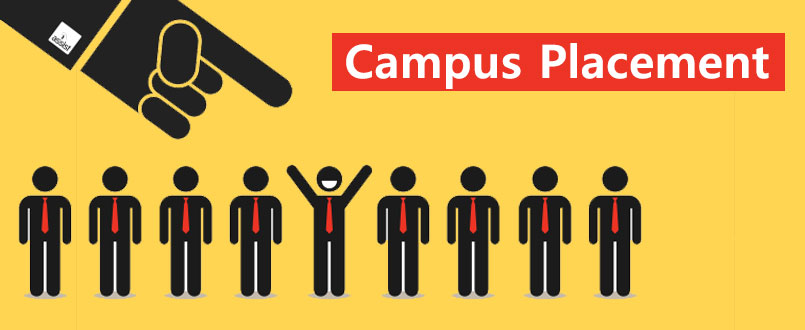